<a href="https://colab.research.google.com/github/archigarg1234/face-recognition-cnn/blob/main/face_reg_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import cv2  # opencv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch
import torchvision

In [9]:
from pathlib import Path
from imblearn.over_sampling import RandomOverSampler

In [10]:
torch.manual_seed(40)

In [11]:
#GET CURRENT DIRECTORY
# dir = Path.cwd()
data = pd.read_csv('fer2013.csv')
# data.head(10)


In [12]:
del data["Usage"]

In [13]:
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}
label_to_text


{0: 'anger',
 1: 'disgust',
 2: 'fear',
 3: 'happiness',
 4: 'sadness',
 5: 'surprise',
 6: 'neutral'}

In [14]:
data['emotion'].value_counts()

,count
emotion,
3,8989
6,6198
4,6077
2,5121
0,4953
5,4002
1,547


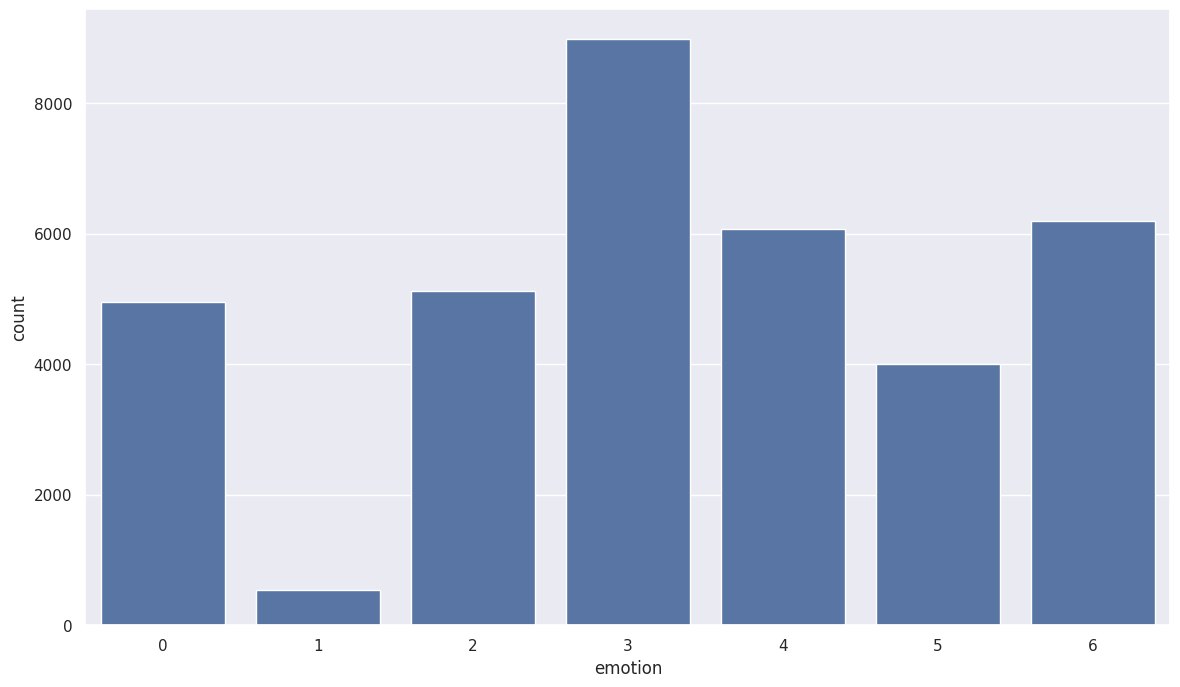

In [15]:
# Plotting the above distribution
plt.figure(figsize=(14, 8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="emotion", data=data)

In [16]:
#Data preprocessing
#1 Class imbalance

x_data = data['pixels']
y_data = data['emotion']

# Perform Random Over Sampling to balance the data
oversampler = RandomOverSampler(sampling_strategy='auto')

x_data, y_data = oversampler.fit_resample(x_data.values.reshape(-1,1), y_data)
print(x_data.shape," ",y_data.shape)


(62923, 1)   (62923,)


In [17]:

x_data = pd.Series(x_data.flatten())
x_data

,0
0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,151 150 147 155 148 133 111 140 170 174 182 15...
2,231 212 156 164 174 138 161 173 182 200 106 38...
3,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...
62918,23 34 32 58 78 77 88 108 156 154 149 146 125 1...
62919,224 224 224 225 225 232 104 67 30 19 80 98 92 ...
62920,138 89 110 104 96 122 125 125 125 136 147 148 ...
62921,88 83 70 59 61 53 40 37 43 46 34 46 62 67 76 1...


In [18]:

x_data = np.array(list(map(str.split, x_data)), np.float32)
x_data/=255

x_data[:10]

array([[0.27450982, 0.3137255 , 0.32156864, ..., 0.41568628, 0.42745098,
        0.32156864],
       [0.5921569 , 0.5882353 , 0.5764706 , ..., 0.75686276, 0.7176471 ,
        0.72156864],
       [0.90588236, 0.83137256, 0.6117647 , ..., 0.34509805, 0.43137255,
        0.59607846],
       ...,
       [0.3019608 , 0.30588236, 0.30980393, ..., 0.49019608, 0.2627451 ,
        0.26666668],
       [0.33333334, 0.32941177, 0.3529412 , ..., 0.22745098, 0.28627452,
        0.32941177],
       [1.        , 0.99607843, 1.        , ..., 0.99607843, 1.        ,
        1.        ]], dtype=float32)

In [19]:
x_data = x_data.reshape(-1, 48, 48, 1)
x_data.shape

(62923, 48, 48, 1)

In [20]:
y_data = np.array(y_data)
y_data = y_data.reshape(y_data.shape[0], 1)
y_data.shape

(62923, 1)

In [21]:
# Split the data and create train-test set
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state = 45)


In [22]:

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((56630, 48, 48, 1), (6293, 48, 48, 1), (56630, 1), (6293, 1))

In [23]:
x_train = torch.tensor(x_train)
y_train = torch.tensor(y_train)
x_test = torch.tensor(x_test)
y_test = torch.tensor(y_test)

In [ ]:
# y_train = torch.nn.functional.one_hot(y_train, 7)
# y_train = y_train.squeeze(1)
# y_train.shape


torch.Size([56630, 7])

In [ ]:
# y_test = torch.nn.functional.one_hot(y_test, 7)
# y_test = y_test.squeeze(1)
# y_test.shape


torch.Size([6293, 7])

# Data Loader

In [24]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert to float32 and permute channels
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).permute(0, 3, 1, 2) / 255.0
x_test_tensor  = torch.tensor(x_test, dtype=torch.float32).permute(0, 3, 1, 2) / 255.0

# Convert labels to long
y_train_tensor = torch.tensor(y_train, dtype=torch.long).squeeze()  # shape: [56630]
y_test_tensor  = torch.tensor(y_test, dtype=torch.long).squeeze()   # shape: [6293]


/tmp/ipython-input-2007841572.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train_tensor = torch.tensor(x_train, dtype=torch.float32).permute(0, 3, 1, 2) / 255.0
/tmp/ipython-input-2007841572.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test_tensor  = torch.tensor(x_test, dtype=torch.float32).permute(0, 3, 1, 2) / 255.0
/tmp/ipython-input-2007841572.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.long).squeeze()  # shape: [56630]
/tmp/ipython-input-2007841572.py:10: U

In [25]:
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset  = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)


# Model Architecture
 We are using CNN because they work best on grid type dataset and also identifies features like edges, textures, curves of the images. Architecture involves feature extraction (convolutional layer(identifies minute featuers), pooling(reduces the size of your tensors) then flatten it, and then we do classification layer.)

 First few layers: learns features like edges, striaght line, slant lines, etc.

 Middle layers of CNN: Learns shapes like circles, squars etc.

 Last layers of CNN - Detects objects in the images like if it is a CAT or a Dog

In [26]:
import torch.nn as nn
import torch.nn.functional as F

In [27]:
class EmotionCNN(nn.Module):
    def __init__(self, num_classes = 7):
        super(EmotionCNN, self).__init__()

        #1st layer
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=2,stride=1, padding = 0),

            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(0.25),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),

            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),


            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=0),

            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(0.25),


            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),

            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=0),

            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )



        # Flatten + Fully Connected layers
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 250),  # adjust based on final spatial size
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(250, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x





In [28]:
#initailize model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EmotionCNN(num_classes=7).to(device)
#define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

#loss function
criterion = nn.CrossEntropyLoss()
num_epochs = 10

for epoch in range(num_epochs):
    model.train()  # set model to training mode

    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:

        images, labels = images.to(device), labels.to(device)
        #forward pass
        outputs = model(images)
        #loss
        loss = criterion(outputs, labels)
        #Backward pass
        optimizer.zero_grad()
        loss.backward()

        #update grads
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

Epoch [1/10], Loss: 1.6534
Epoch [2/10], Loss: 1.3070
Epoch [3/10], Loss: 1.1091
Epoch [4/10], Loss: 0.9725
Epoch [5/10], Loss: 0.8799
Epoch [6/10], Loss: 0.7966
Epoch [7/10], Loss: 0.7247
Epoch [8/10], Loss: 0.6576
Epoch [9/10], Loss: 0.5991
Epoch [10/10], Loss: 0.5505


In [29]:
model.eval()

EmotionCNN(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.25, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.25, inplace=False)
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (16): Conv2d(12

In [47]:

model.eval()

# Turn off gradient tracking
with torch.no_grad():
    correct = 0
    total = 0
    running_loss = 0.0

    for images, labels in test_loader:
        # Move data to GPU if available
        images, labels = images.to(device),  labels.to(device)


        # Forward pass
        outputs = model(images)

        _, predicted = torch.max(outputs, 1)

        # Compute loss if you want
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        # Update correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


    # Final metrics

    test_loss = running_loss / len(test_loader)

    test_accuracy = correct / total

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy*100:.2f}%')


Test Loss: 0.8352, Test Accuracy: 71.67%


In [63]:
import torch

# Set model to evaluation mode
model.eval()
y_pred = []
y_true = []
# Turn off gradient tracking (faster + less memory)
with torch.no_grad():
    correct = 0
    total = 0
    running_loss = 0.0

    for images, labels in train_loader:
        # Move data to GPU if available
        images = images.to('cuda' if torch.cuda.is_available() else 'cpu')
        labels = labels.to('cuda' if torch.cuda.is_available() else 'cpu')

        # Forward pass
        outputs = model(images)

        _, predicted = torch.max(outputs, 1)

        # Compute loss if you want
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        # Update correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

    # Final metrics
    train_loss = running_loss / len(train_loader)
    train_accuracy = correct / total

print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy*100:.2f}%')


Train Loss: 0.5599, Train Accuracy: 81.30%


In [65]:

# Getting Classification Report
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78      8054
           1       1.00      0.88      0.94      8094
           2       0.79      0.74      0.76      8109
           3       0.82      0.90      0.86      8083
           4       0.73      0.68      0.70      8101
           5       0.94      0.90      0.92      8120
           6       0.71      0.80      0.75      8069

    accuracy                           0.81     56630
   macro avg       0.82      0.81      0.81     56630
weighted avg       0.82      0.81      0.81     56630



In [66]:
torch.save(model, "Facial_recognition_saved_model.pth")